<a href="https://colab.research.google.com/github/qusaysellat/Python-Machine-Lerning-Tutorial/blob/master/CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THIS IS A SIMPLE CNN BULIT WITH KERAS FOR** *MNIST DATASET*

>NAME : [QUSAY SELLAT](https://github.com/qusaysellat)

>FOR MORE INFORMATION ABOUT 'MNIST' VISIT
[THIS SITE](http://yann.lecun.com/exdb/mnist/)

In [1]:
# first lets import the packages we are going to use
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# then we define the parameters we are going to use

# lets start by defining hyperparameters
batch_size = 128
epoches = 100
drop_conv = 0.15
drop_hidden = 0.1

# then define model input and output parameters
classes = 10
rows = 28
cols = 28
pixels = 784

In [0]:
# now we have to load and pre-process MNIST dataset

# load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape so that we add number of channels to fit conv and pooling layers
X_train = X_train.reshape([-1, rows, cols, 1])
X_test = X_test.reshape([-1, rows, cols, 1])

# normalize input so that our algorithm converges faster
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

# finally we convert the labels to one-hot-vectors
Y_train = np_utils.to_categorical(Y_train, classes) 
Y_test = np_utils.to_categorical(Y_test, classes)

In [4]:
# we are ready to write our model

# get an empty instance
CNN = Sequential()

# add first conv layer
CNN.add(Conv2D(filters=32, kernel_size=3, strides=3, padding ='same', activation='relu', kernel_initializer='glorot_normal'))
CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
CNN.add(Dropout(drop_conv))

# add second conv layer
CNN.add(Conv2D(filters=64, kernel_size=3, strides=3, padding ='same', activation='relu', kernel_initializer='glorot_normal'))
CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
CNN.add(Dropout(drop_conv))

# add third conv layer
CNN.add(Conv2D(filters=128, kernel_size=3, strides=3, padding ='same', activation='relu', kernel_initializer='glorot_normal'))
CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
CNN.add(Dropout(drop_conv))

# build the dense layers
CNN.add(Flatten())
CNN.add(Dense(512, activation='relu', kernel_initializer='glorot_normal'))
CNN.add(Dropout(drop_hidden))
CNN.add(Dense(classes, activation='softmax', kernel_initializer='glorot_normal'))

In [5]:
# it's time to run our model

# compile
CNN.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# summury of our model
CNN.build(input_shape=(None, rows, cols, 1))
CNN.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 10, 10, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 64)          0         
_

In [7]:
# fit
history = CNN.fit(x=X_train, y=Y_train, batch_size=batch_size, epochs=epoches, verbose=1, shuffle=True)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
60000/60000 [==============================] - 10s 165us/step - loss: 0.8262 - acc: 0.7157
Epoch 2/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.3825 - acc: 0.8762
Epoch 3/100
60000/60000 [==============================] - 10s 160us/step - loss: 0.2844 - acc: 0.9090
Epoch 4/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.2406 - acc: 0.9232
Epoch 5/100
60000/60000 [==============================] - 10s 160us/step - loss: 0.2113 - acc: 0.9325
Epoch 6/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.1911 - acc: 0.9382
Epoch 7/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.1758 - acc: 0.9442
Epoch 8/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.1665 - acc: 0.9475
Epoch 9/100
60000/60000 [==============================] - 9s 158us/step - loss: 

this is how accuracy changes with iterations


Text(0, 0.5, 'accuracy')

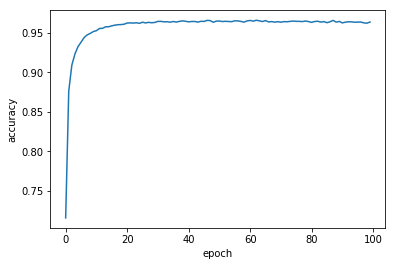

In [11]:
print('this is how accuracy changes with iterations')
plt.plot(history.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

notice how cost value changes with iterations


Text(0, 0.5, 'cost')

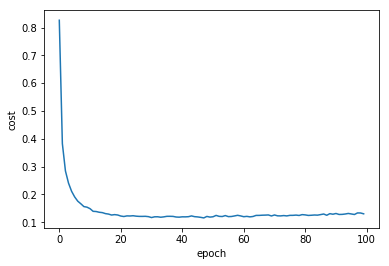

In [9]:
print('notice how cost value changes with iterations')
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('cost')

In [10]:
# evaluate
evaluate = CNN.evaluate(x=X_test, y=Y_test, batch_size=batch_size)
print(evaluate[0], evaluate[1])

10000/10000 [==============================] - 0s 47us/step
0.07617864265348762 0.9773
